<h1> Group 20 - DMML Coursework 2 - J48<h1>
    
<hr>

Disclaimer : Whilst we know we are not running J48 (a java equivalent of the C4.5 algorithm), we simply kept this notation inplace of CART for ease of marking. 

<h3 style="color:blue"> Data <h3> 

Goal : Setup full training data set :

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#read the attribute csvs file into respective dataframes
X = pd.read_csv ('x_train_gr_smpl.csv')


# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']

#join the two such that Y is the last column
XYraw = pd.concat([X,Y], axis=1)
#check the concatination
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [3]:

#convert numberic to nominal 
XYraw[['Class']] = XYraw[['Class']].replace([0, 1, 2,3,4,5,6,7,8,9], ['zero', 'one', 'two','three', 'four', 'five', 'six', 'seven', 'eight',
                                 'nine'])

XYraw.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,zero
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,zero
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,zero
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,zero
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,zero


In [4]:

#randomise 
XYraw_ran = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw_ran)

          0      1      2      3      4      5      6      7      8      9  \
0      33.0   27.0   32.0   33.0   26.0   29.0   24.0   23.0   22.0   23.0   
1     159.0  167.0  224.0  255.0  255.0  255.0  253.0  231.0  217.0  208.0   
2      54.0   26.0   19.0   19.0   23.0   45.0   56.0   43.0   25.0   24.0   
3     254.0  254.0  254.0  255.0  255.0  255.0  254.0  255.0  255.0  255.0   
4      23.0   22.0   20.0   18.0   18.0   20.0   22.0   22.0   22.0   23.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   21.0   24.0   23.0   24.0   30.0   26.0   21.0   21.0   26.0   23.0   
9686   45.0   44.0   51.0   50.0   49.0   53.0   66.0   62.0   46.0   35.0   
9687   37.0   40.0   50.0   60.0   47.0   36.0   53.0   40.0   32.0   33.0   
9688   27.0   23.0   30.0   32.0   30.0   34.0   33.0   26.0   28.0   31.0   
9689   26.0   26.0   27.0   30.0   39.0   55.0   96.0  124.0  142.0  113.0   

      ...   2295   2296   2297   2298   2299  2300   2301   230

In [5]:
#generate this as a csv to directly feed into analyses on independent notebooks
#XYraw_ran.to_csv('For_10_Fold_Cross_Validation.csv', index = False)

Split Data into data and expected calsses


In [6]:
#read in data from csv 
training_Data = pd.read_csv("For_10_Fold_Cross_Validation.csv")

#look at shape
training_Data.shape 

#look at data format
training_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,31.0,28.0,25.0,22.0,22.0,25.0,26.0,25.0,25.0,four
1,26.0,27.0,28.0,27.0,27.0,24.0,13.0,12.0,21.0,84.0,...,24.0,52.0,77.0,94.0,96.0,96.0,93.0,91.0,89.0,eight
2,149.0,110.0,68.0,55.0,54.0,55.0,45.0,36.0,31.0,35.0,...,149.0,96.0,52.0,54.0,68.0,87.0,110.0,104.0,92.0,two
3,73.0,80.0,86.0,97.0,113.0,120.0,118.0,84.0,56.0,46.0,...,98.0,99.0,100.0,101.0,99.0,98.0,100.0,106.0,114.0,one
4,62.0,58.0,57.0,57.0,57.0,58.0,58.0,54.0,52.0,50.0,...,30.0,29.0,28.0,26.0,25.0,27.0,28.0,28.0,31.0,three


In [7]:
#define the data to be used as all but the class attribute from the data 
X_Train = training_Data.drop('Class', axis = 1)

#define the expexted value to be the class column of the input data 
y_train = training_Data['Class']

Scale data

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_Train)



In [134]:
from sklearn.model_selection import train_test_split

X_splitTrain, X_splitTest, y_splitTrain, y_splitTest = train_test_split(X_Train, y_train, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9690, 2304) (3090, 2304) (9690,) (3090,)


<h4> Setup Test Data <h4>

Goal : Import test data from file and set it as  t_test and y_test

In [9]:
testData = pd.read_csv ('Test_Dataset.csv')

X_Test = testData.drop('Class', axis = 1)
y_test = testData['Class']


X_test = sc.fit_transform(X_Test)

<h4> Setup 4000 Split of test data <h4>
    

Goal : Take 4000 instances from the original training file and add them to the test file

In [10]:
#Check length of training data
len(training_Data)

9690

In [11]:
#split data into two divisions
data_split4000, data_split5690= training_Data[:4000], training_Data[4000:]

#test new split 
len(data_split4000)

4000

In [12]:
#merge test and 4000 cases from above 
testData_with4000 =pd.concat([testData, data_split4000])

In [13]:
#size of testData before addition
len(testData)

3090

In [14]:
#check items have been added to testData
len(testData_with4000)

7090

In [15]:
#setup training data
X_Train_4000Split = data_split5690.drop('Class', axis = 1)
y_train_4000Split = data_split5690['Class']


#setup test data
X_Test_4000Split = testData_with4000.drop('Class', axis = 1)
y_test_4000Split = testData_with4000['Class']



sc = StandardScaler()
X_train_4000Split = sc.fit_transform(X_Train_4000Split)
X_test_4000Split = sc.fit_transform(X_Test_4000Split)

In [16]:
#generate this as a csv to directly feed into analyses on independent notebooks
testData_with4000.to_csv('testData_4000Split.csv', index = False)

In [17]:
#generate this as a csv to directly feed into analyses on independent notebooks
data_split5690.to_csv('trainData_5690Split.csv', index = False)

<h4> Setup 9000 Split <h4> 

Goal : Take 9000 instances from the original training file and add them to the test file

In [18]:
#Check length of training data
len(training_Data)

9690

In [19]:
#split data into two divisions
data_split9000, data_split690= training_Data[:9000], training_Data[9000:]

#test new split 
len(data_split9000)

9000

In [20]:
#merge test and 4000 cases from above 
testData_with9000 =pd.concat([testData, data_split9000])

In [21]:
#size of testData before addition 
len(testData)

3090

In [22]:
#check items have been added to testData
len(testData_with9000)

12090

In [23]:
#setup training data
X_Train_9000Split = data_split690.drop('Class', axis = 1)
y_train_9000Split = data_split690['Class']


#setup test data
X_Test_9000Split = testData_with9000.drop('Class', axis = 1)
y_test_9000Split = testData_with9000['Class']

#scale data
X_train_9000Split = sc.fit_transform(X_Train_9000Split)
X_test_9000Split = sc.fit_transform(X_Test_9000Split)

In [24]:
#generate this as a csv to directly feed into analyses on independent notebooks
testData_with9000.to_csv('testData_9000Split.csv', index = False)

In [25]:
#generate this as a csv to directly feed into analyses on independent notebooks
data_split690.to_csv('trainData_690Split.csv', index = False)

In [26]:
len(y_test_9000Split)

12090

In [27]:
len(y_train_9000Split)

690

In [28]:
len(X_train_9000Split)

690

In [29]:
len(X_test_9000Split)

12090

Exploratory Data

In [30]:
#Read in data
testData_Explore = pd.read_csv ('Test_Exploratory_random.csv')
data_Explore = pd.read_csv ('Top_20_Exploratory_random.csv')

In [31]:
#setup training data
X_Train_Explore = data_Explore.drop('Class', axis = 1)
y_train_Explore = data_Explore['Class']


#setup test data
X_Test_Explore = testData_Explore.drop('Class', axis = 1)
y_test_Explore = testData_Explore['Class']



sc = StandardScaler()
X_train_Explore = sc.fit_transform(X_Train_Explore)
X_test_Explore = sc.fit_transform(X_Test_Explore)

Setup Dataframe for all tree data

In [21]:
treeComparisonTable = pd.DataFrame(columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ])

In [22]:
treeComparisonTable

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy


Setup Tree Comparison DataFrame

Summary : 

X_train - full training data (minus class data) <br>
X_train_4000Split - 4000 removed instances from X_train<br>
X_train_9000Split - 9000 removed instances from X_train <br>

X_test - original test data 
X_test_4000Split - 4000 more instances, taken from X_train<br>
X_test_9000Split - 9000 more instances, taken from X_train<br>

y_train - class attributes for the full training data<br>
y_train_4000Split - 4000 removed instances than y_train<br>
y_train_9000Split - 9000 removed instances than y_train<br>

y_test - class attributes for original testing data <br>
y_test_4000Split - 4000 more instances, taken from y_train <br>
y_test_9000Split - 9000 more instances, taken from y_train <br>

<h2> Decision Trees <h2> 
    <hr>
<h2> J48 - Default Settings<h2>

Decision tree adapted from : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<hr>
Cross-Validation adapted from : 
https://scikit-learn.org/stable/modules/cross_validation.html 
    
HOWEVER Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. 

In [139]:
#imports for J48
from sklearn.tree import DecisionTreeClassifier

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import export_graphviz, plot_tree

import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict



<h4> Cross validation <h4>

Goal : Run cross a decision tree classifier with 10 fold cross validation then output metrics

In [38]:
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#
# Sklearn uses CART rather than C4.5 which is the algorithm that J48 runs off so this could be incorrect. Both 

J48_crossVal = DecisionTreeClassifier()
J48_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48 = cross_val_score(J48_crossVal, X_train, y_train, cv=10)

Text(0.5, 1.0, 'Average score: 0.8296181630546956')

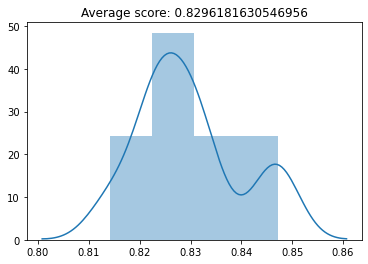

In [39]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_J48)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_J48)))

In [40]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_crossVal = cross_val_predict(J48_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_crossVal = confusion_matrix(y_train, y_pred_J48_crossVal)

#accuracy report
classification_report_J48_crossVal = classification_report(y_train, y_pred_J48_crossVal)

#Tree topology metrics
n_nodes_J48_crossVal = J48_crossVal.tree_.node_count
depth_J48_crossVal = J48_crossVal.get_depth()
num_Leaves_J48_crossVal = J48_crossVal.get_n_leaves()


#Find the accuracy of this model based on the test data
accuracy_J48_crossVal = accuracy_score(y_train, y_pred_J48_crossVal)*100

J48_crossVal_data = [n_nodes_J48_crossVal, depth_J48_crossVal, num_Leaves_J48_crossVal, accuracy_J48_crossVal]


In [41]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_crossVal)

print("\n")
print(classification_report_J48_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_crossVal))
print("Depth of Tree : " + str(depth_J48_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_crossVal))

Confusion Matrix
[[ 444    6    5    9   18    8   13   12   20    5]
 [   4  157    7    6    5    7    4    8   10    2]
 [  10    6 1759    1   83    6    2   22   79   12]
 [  10    3    3  199    7    6    6   17   16    3]
 [  13    7   96    6 1854   12   14   50  152   16]
 [   6    9    5    4    7  185   11    2    8    3]
 [   8    5    4    6   15    1  297   16    6    2]
 [   9    8   26   10   40    6   11 1213   78    9]
 [  15    9   87   13  154   18   10   93 1839   12]
 [   1    1   17    4   26    0    0    5   10  146]]


              precision    recall  f1-score   support

       eight       0.85      0.82      0.84       540
        five       0.74      0.75      0.75       210
        four       0.88      0.89      0.88      1980
        nine       0.77      0.74      0.75       270
         one       0.84      0.84      0.84      2220
       seven       0.74      0.77      0.76       240
         six       0.81      0.82      0.82       360
       three     

<h4>Part 1b - Train Test Split - 33% Split
    <h4>

In [142]:
#define the model to be used 
J48_trainTestSplit = DecisionTreeClassifier()

#fit this model using the test data
J48_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_J48_trainTestSplit = J48_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_J48_trainTestSplit = confusion_matrix(y_splitTest, y_pred_J48_trainTestSplit)

#accuracy report
classification_report_J48_trainTestSplit = classification_report(y_splitTest, y_pred_J48_trainTestSplit)

#Tree topology metrics
n_nodes_J48_trainTestSplit = J48_trainTestSplit.tree_.node_count
depth_J48_trainTestSplit = J48_trainTestSplit.get_depth()
num_Leaves_J48_trainTestSplit = J48_trainTestSplit.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_trainTestSplit = accuracy_score(y_splitTest, y_pred_J48_trainTestSplit)*100

J48_trainTestSplit_data = [n_nodes_J48_trainTestSplit, depth_J48_trainTestSplit, num_Leaves_J48_trainTestSplit, accuracy_J48_trainTestSplit]

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_trainTestSplit)
print("\n")
print(classification_report_J48_trainTestSplit)

print("Number of Nodes : " + str(n_nodes_J48_trainTestSplit))
print("Depth of Tree : " + str(depth_J48_trainTestSplit))
print("Number of Leaves : " + str(num_Leaves_J48_trainTestSplit))
print("Accuracy of Model : " + str(accuracy_J48_trainTestSplit))


Confusion Matrix
[[141   4   4   7   4   3   9   5  12   0]
 [  0  38   1   3   2   2   3   2   6   1]
 [  1   2 555   0  30   1   5  10  20   3]
 [  5   0   3  65   3   2   3   6   9   0]
 [  6   1  34   5 627   4   3  22  44   8]
 [  4   1   0   0   4  49   5   0   1   1]
 [  6   2   3   3   1   8  79   5   2   2]
 [  6   2   4   5  15   4   3 403  27   2]
 [  6   5  38   7  56   1   2  30 603   3]
 [  0   0   4   0  12   1   0   0   4  55]]


              precision    recall  f1-score   support

       eight       0.81      0.75      0.77       189
        five       0.69      0.66      0.67        58
        four       0.86      0.89      0.87       627
        nine       0.68      0.68      0.68        96
         one       0.83      0.83      0.83       754
       seven       0.65      0.75      0.70        65
         six       0.71      0.71      0.71       111
       three       0.83      0.86      0.84       471
         two       0.83      0.80      0.82       751
        z

<hr>
<h4>Part 2 - Using test data<h4>

Goal : Run decision classifier on test data provided

In [51]:
#define the model to be used 
J48_withTestData = DecisionTreeClassifier()

#fit this model using the test data
J48_withTestData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_withTestData = J48_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_J48_withTestData = confusion_matrix(y_test, y_pred_J48_withTestData)

#accuracy report
classification_report_J48_withTestData = classification_report(y_test, y_pred_J48_withTestData)

#Tree topology metrics
n_nodes_J48_withTestData = J48_withTestData.tree_.node_count
depth_J48_withTestData = J48_withTestData.get_depth()
num_Leaves_J48_withTestData = J48_withTestData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_withTestData = accuracy_score(y_test, y_pred_J48_withTestData)*100

J48_withTestData_data = [n_nodes_J48_withTestData, depth_J48_withTestData, num_Leaves_J48_withTestData, accuracy_J48_withTestData]

In [52]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_withTestData)
print("\n")
print(classification_report_J48_withTestData)

print("Number of Nodes : " + str(n_nodes_J48_withTestData))
print("Depth of Tree : " + str(depth_J48_withTestData))
print("Number of Leaves : " + str(num_Leaves_J48_withTestData))
print("Accuracy of Model : " + str(accuracy_J48_withTestData))

Confusion Matrix
[[ 62  16   6   4   8   7  11  17  16   3]
 [  0  28   0   0   0   2   0  30   0   0]
 [  7   4 471   2  51   5   9  55  38  18]
 [  6   9   0  38   8   8   1   7  13   0]
 [  3   0  53   2 573   5   0   8  60  16]
 [  0   9   2   3  29   8   1   3   2   3]
 [ 11  10   1   3   9   0  41   6   7   2]
 [  8   2  23   8  42   0   4 309  53   1]
 [  9   4  58   2  70   4   5  50 546   2]
 [  1   0  18   1   6   0   2   3  10  19]]


              precision    recall  f1-score   support

       eight       0.58      0.41      0.48       150
        five       0.34      0.47      0.39        60
        four       0.75      0.71      0.73       660
        nine       0.60      0.42      0.50        90
         one       0.72      0.80      0.76       720
       seven       0.21      0.13      0.16        60
         six       0.55      0.46      0.50        90
       three       0.63      0.69      0.66       450
         two       0.73      0.73      0.73       750
        z

<hr>
<h4>Part 3 - 4000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set.

In [44]:
#define the model to be used 
J48_4000Split = DecisionTreeClassifier()

#fit this model using the test data
J48_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_4000Split = J48_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_4000Split)

#generate classification report
classification_report_J48_4000Split = classification_report(y_test_4000Split, y_pred_J48_4000Split)

#Tree topology metrics
n_nodes_J48_4000Split = J48_4000Split.tree_.node_count
depth_J48_4000Split = J48_4000Split.get_depth()
num_Leaves_J48_4000Split = J48_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_4000Split)*100

J48_4000Split_data = [n_nodes_J48_4000Split, depth_J48_4000Split, num_Leaves_J48_4000Split, accuracy_J48_4000Split]

In [45]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_4000Split)
print("\n")
print(classification_report_J48_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_4000Split))
print("Depth of Tree : " + str(depth_J48_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_4000Split))

Confusion Matrix
[[ 212    6   13   17   32   16    8   28   25    6]
 [   1   79   15    1    4    2    1   30    6    0]
 [  10   11 1104   12  134    5   12   53   78   27]
 [  18    7    6  119   12    3    7    7   31    2]
 [  16    6  122    3 1293    6    0   27  160   15]
 [   3    5    9    5   21   79    8    7    9   19]
 [  30   11    6    8    4    6  145   19    8    4]
 [  21   10   24   13   64    0   24  765  134   10]
 [  18   10   91    8  141    5    9  101 1273    7]
 [   2    0   21    2   41    0    0    6    7   69]]


              precision    recall  f1-score   support

       eight       0.64      0.58      0.61       363
        five       0.54      0.57      0.56       139
        four       0.78      0.76      0.77      1446
        nine       0.63      0.56      0.60       212
         one       0.74      0.78      0.76      1648
       seven       0.65      0.48      0.55       165
         six       0.68      0.60      0.64       241
       three     

<hr>
<h4>Part 4 - 9000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set

In [46]:
#define the model to be used 
J48_9000Split = DecisionTreeClassifier()

#fit this model using the test data
J48_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_9000Split = J48_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_9000Split)

#generate classification report
classification_report_J48_9000Split = classification_report(y_test_9000Split, y_pred_J48_9000Split)

#Tree topology metrics
n_nodes_J48_9000Split = J48_9000Split.tree_.node_count
depth_J48_9000Split = J48_9000Split.get_depth()
num_Leaves_J48_9000Split = J48_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_9000Split)*100

J48_9000Split_data = [n_nodes_J48_9000Split, depth_J48_9000Split, num_Leaves_J48_9000Split, accuracy_J48_9000Split]

In [47]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_9000Split)
print("\n")
print(classification_report_J48_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_9000Split))
print("Depth of Tree : " + str(depth_J48_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_9000Split))

Confusion Matrix
[[ 295   31   50   27   55   15   54   44   47   28]
 [  46  105   30   18    4    1   12   26   10    0]
 [  60   55 1581   24  325   16   50   76  276   23]
 [  58    5   20  146    7    8   45   22   15    8]
 [  55   34  249   52 1653    3   23  103  511  104]
 [  34    5   39   26   20   77    9   39   32    6]
 [  71    5   22   13   16    3  181   77   34    2]
 [  36   36   93   24  166    5   78 1050  272    8]
 [ 109   13  300   48  388    3   33  341 1585   32]
 [  12    0   39    5   90    0    0   21   24   63]]


              precision    recall  f1-score   support

       eight       0.38      0.46      0.41       646
        five       0.36      0.42      0.39       252
        four       0.65      0.64      0.64      2486
        nine       0.38      0.44      0.41       334
         one       0.61      0.59      0.60      2787
       seven       0.59      0.27      0.37       287
         six       0.37      0.43      0.40       424
       three     

<h3> Exploratory Dataset <h3>

In [48]:
#define the model to be used 
J48_Explore = DecisionTreeClassifier()

#fit this model using the test data
J48_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_J48_Explore = J48_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_J48_Explore = confusion_matrix(y_test_Explore, y_pred_J48_Explore)

#generate classification report
classification_report_J48_Explore = classification_report(y_test_Explore, y_pred_J48_Explore)

#Tree topology metrics
n_nodes_J48_Explore = J48_Explore.tree_.node_count
depth_J48_Explore = J48_Explore.get_depth()
num_Leaves_J48_Explore = J48_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_Explore = accuracy_score(y_test_Explore, y_pred_J48_Explore)*100

J48_Explore_data = [n_nodes_J48_Explore, depth_J48_Explore, num_Leaves_J48_Explore, accuracy_J48_Explore]

In [49]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_Explore)
print("\n")
print(classification_report_J48_Explore)

print("Number of Nodes : " + str(n_nodes_J48_Explore))
print("Depth of Tree : " + str(depth_J48_Explore))
print("Number of Leaves : " + str(num_Leaves_J48_Explore))
print("Accuracy of Model : " + str(accuracy_J48_Explore))

Confusion Matrix
[[ 79   3   4  10   1   7  21   7  14   4]
 [  7  20  19   0   0   3   0  11   0   0]
 [  6   1 454   2  70   3  13  37  66   8]
 [  9  12   0  35   1  16   0   3  14   0]
 [  8   1  80   1 525   4   3  17  70  11]
 [  3   0  13   3   7   8   2   6  16   2]
 [ 19   3   5   5   5   2  38   7   5   1]
 [  2   3   6  10  25   0   4 349  47   4]
 [  7   2  51   4  61   0   4  61 557   3]
 [  0   0   5   0  10   0   5   5  13  22]]


              precision    recall  f1-score   support

       eight       0.56      0.53      0.54       150
        five       0.44      0.33      0.38        60
        four       0.71      0.69      0.70       660
        nine       0.50      0.39      0.44        90
         one       0.74      0.73      0.74       720
       seven       0.19      0.13      0.16        60
         six       0.42      0.42      0.42        90
       three       0.69      0.78      0.73       450
         two       0.69      0.74      0.72       750
        z

<h4> Generate Table to Explore Results <h4>

In [53]:
infoFrames = [J48_crossVal_data, J48_withTestData_data, J48_4000Split_data, J48_9000Split_data, J48_Explore_data]

J48_Table = pd.DataFrame(infoFrames, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split','Exploratory'])

J48_Table

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1483,24,742,83.519092
Test Data,1483,24,742,67.799353
4000 Split,1155,21,578,72.468265
9000 Split,231,14,116,55.715467
Exploratory,1785,21,893,67.540453


<h3> J48 Parameter Exploration <h3>

<hr>


    
Goal : To understand how binary splits or multiple branching, pruning,
confidence threshold for pruning, and the minimal number of instances permissible per leaf.

<h4> binary splits or multiple branching <h4> 

Editing this with the DecisionTreeClassifier is not possible, thus we must hypothesize on its effects.

<h4>Pruning <h4>

 Information on pruning a decision tree classifier, if it doesnt work open a tab in incognito mode and it will show you the full article. 
 https://medium.com/swlh/post-pruning-decision-trees-using-python-b5d4bcda8e23
 
 the below implementation is heavily influenced by the above link.

In [45]:
#cost_complexity_pruning_path - implements the pruning process and returns the effective 
# alphas and respective impurities of the prund tree

classifier_J48_TD_Pruned=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)

#ccp_alpha is used as a parameter for post pruning - ie pruning the tree after it has 'grown'
ccp_alphas, impurities = classifier_J48_TD_Pruned.ccp_alphas, classifier_J48_TD_Pruned.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

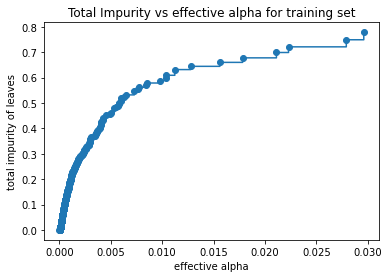

In [46]:
#Plotting the alphas vs impurities(except the last alpha corresponding to root node):

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [47]:

#the below codeis disabled as it takes over 4 hours to run, running DecisionTreeClassifer over 661 instances.
# In short, it runs decision tree classifeirs over trees pruned with increasing alphas, then saves these results to a 
# list and graphs the resulting accuracies. This allows for observation of the best ccp_alpha value to use for 
# this model. 
'''
#build a forest of trees with different values of ccp_alpha values extracted from 
# cost_complexity_pruning_path in order. The last tree will be the root node.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

#Remove the last tree in the list as it is a single noded tree with a depth of 0, thus we can remove. 

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# plot how different values of ccp_alpha effects the number of nodes and depth of the corresponding pruned trees

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#plot the accuracy vs alpha for training and test 

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

#turn the above dictionary into a dataframe then save it to a file 
#alphaData = pd.DataFrame(clfs)
#alphaData.to_csv('alphaData.csv')
'''

'\n#build a forest of trees with different values of ccp_alpha values extracted from \n# cost_complexity_pruning_path in order. The last tree will be the root node.\n\nclfs = []\nfor ccp_alpha in ccp_alphas:\n    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)\n    clf.fit(X_train, y_train)\n    clfs.append(clf)\n\nprint("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(\nclfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))\n\n#Remove the last tree in the list as it is a single noded tree with a depth of 0, thus we can remove. \n\nclfs = clfs[:-1]\nccp_alphas = ccp_alphas[:-1]\n\n# plot how different values of ccp_alpha effects the number of nodes and depth of the corresponding pruned trees\n\nnode_counts = [clf.tree_.node_count for clf in clfs]\ndepth = [clf.tree_.max_depth for clf in clfs]\nfig, ax = plt.subplots(2, 1)\nax[0].plot(ccp_alphas, node_counts, marker=\'o\', drawstyle="steps-post")\nax[0].set_xlabel("alp

Conclusions from above : approx 0.001 is the most effective value of cc_alpha on the test set. Pruning only reduces the accuracy of the model ran on its training data. 

part 1 - Cross-Validation

In [54]:
J48_pruned_crossVal = DecisionTreeClassifier(ccp_alpha= 0.001)
J48_pruned_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48_pruned = cross_val_score(J48_pruned_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_pruned_crossVal = cross_val_predict(J48_pruned_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_pruned_crossVal = confusion_matrix(y_train, y_pred_J48_pruned_crossVal)

#accuracy report
classification_report_J48_pruned_crossVal = classification_report(y_train, y_pred_J48_pruned_crossVal)

#Tree topology metrics
n_nodes_J48_pruned_crossVal = J48_pruned_crossVal.tree_.node_count
depth_J48_pruned_crossVal = J48_pruned_crossVal.get_depth()
num_Leaves_J48_pruned_crossVal = J48_pruned_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_crossVal = accuracy_score(y_train, y_pred_J48_pruned_crossVal)*100

J48_pruned_crossVal_data = [n_nodes_J48_pruned_crossVal, depth_J48_pruned_crossVal, num_Leaves_J48_pruned_crossVal, accuracy_J48_pruned_crossVal]


In [55]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_crossVal)
print("\n")
print(classification_report_J48_pruned_crossVal)

print("Number of Nodes : " + str(n_nodes_J48_pruned_crossVal))
print("Depth of Tree : " + str(depth_J48_pruned_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_pruned_crossVal))

Confusion Matrix
[[ 406    4   12   14   29    9   15   21   23    7]
 [   8  122    7   13   10   11    5    9   24    1]
 [   8   15 1717    2  100    2    4   29   89   14]
 [  14    5    3  183    8    2    9   18   25    3]
 [   9   10  108    8 1828    5    6   50  181   15]
 [   5   11    7    3   23  145   16   14   14    2]
 [  19    6   10    7   14    5  257   25   16    1]
 [  16    5   27   22   49    5   10 1174   95    7]
 [  15   10   97   18  162   10   12   93 1830    3]
 [   3    0   27    2   33    0    0    7   15  123]]


              precision    recall  f1-score   support

       eight       0.81      0.75      0.78       540
        five       0.65      0.58      0.61       210
        four       0.85      0.87      0.86      1980
        nine       0.67      0.68      0.68       270
         one       0.81      0.82      0.82      2220
       seven       0.75      0.60      0.67       240
         six       0.77      0.71      0.74       360
       three     

TrainTestSplit


In [143]:
#define the model to be used 
J48_pruned_trainTestSplit = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_J48_pruned_trainTestSplit = J48_pruned_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_J48_pruned_trainTestSplit = confusion_matrix(y_splitTest, y_pred_J48_pruned_trainTestSplit)

#accuracy report
classification_report_J48_pruned_trainTestSplit = classification_report(y_splitTest, y_pred_J48_pruned_trainTestSplit)

#Tree topology metrics
n_nodes_J48_pruned_trainTestSplit = J48_pruned_trainTestSplit.tree_.node_count
depth_J48_pruned_trainTestSplit = J48_pruned_trainTestSplit.get_depth()
num_Leaves_J48_pruned_trainTestSplit = J48_pruned_trainTestSplit.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_trainTestSplit = accuracy_score(y_splitTest, y_pred_J48_pruned_trainTestSplit)*100

J48_pruned_trainTestSplit_data = [n_nodes_J48_pruned_trainTestSplit, depth_J48_pruned_trainTestSplit, num_Leaves_J48_pruned_trainTestSplit, accuracy_J48_pruned_trainTestSplit]

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_trainTestSplit)
print("\n")
print(classification_report_J48_pruned_trainTestSplit)

print("Number of Nodes : " + str(n_nodes_J48_pruned_trainTestSplit))
print("Depth of Tree : " + str(depth_J48_pruned_trainTestSplit))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_trainTestSplit))
print("Accuracy of Model : " + str(accuracy_J48_pruned_trainTestSplit))


Confusion Matrix
[[147   2   5   7   8   1   4   7   8   0]
 [  1  31   1   5   4   3   7   3   3   0]
 [  0   3 543   0  45   1   5   8  20   2]
 [  5   0   2  57   1   2  10  11   7   1]
 [  2   0  47   3 612   1   2  20  62   5]
 [  6   1   0   1   4  41   6   3   2   1]
 [  2   0   8   2   1   9  74   8   5   2]
 [  4   0   6   1  24   1   6 401  27   1]
 [  4   2  37   4  68   1   6  35 593   1]
 [  0   0   4   0  14   0   0   0   7  51]]


              precision    recall  f1-score   support

       eight       0.86      0.78      0.82       189
        five       0.79      0.53      0.64        58
        four       0.83      0.87      0.85       627
        nine       0.71      0.59      0.65        96
         one       0.78      0.81      0.80       754
       seven       0.68      0.63      0.66        65
         six       0.62      0.67      0.64       111
       three       0.81      0.85      0.83       471
         two       0.81      0.79      0.80       751
        z

Part 2 - With test Data

In [56]:
#define the model to be used 
J48_pruned_testData = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_pruned_testData = J48_pruned_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_pruned_testData = confusion_matrix(y_test, y_pred_J48_pruned_testData)

#generate classification report
classification_report_J48_pruned_testData = classification_report(y_test, y_pred_J48_pruned_testData)

#Tree topology metrics
n_nodes_J48_pruned_testData = J48_pruned_testData.tree_.node_count
depth_J48_pruned_testData = J48_pruned_testData.get_depth()
num_Leaves_J48_pruned_testData = J48_pruned_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_testData = accuracy_score(y_test, y_pred_J48_pruned_testData)*100

J48_pruned_testData_data = [n_nodes_J48_pruned_testData, depth_J48_pruned_testData, num_Leaves_J48_pruned_testData, accuracy_J48_pruned_testData]


In [57]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_testData)
print("\n")
print(classification_report_J48_pruned_testData)

print("Number of Nodes : " + str(n_nodes_J48_pruned_testData))
print("Depth of Tree : " + str(depth_J48_pruned_testData))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_testData))
print("Accuracy of Model : " + str(accuracy_J48_pruned_testData))

Confusion Matrix
[[ 57   8  17   7  10   9   7  19  14   2]
 [  0  28   0   0   0   2   0  30   0   0]
 [  3   3 479   1  46   9   6  52  48  13]
 [  3   4   0  44  16   0   1   0  22   0]
 [  4   0  67   2 555   1   3  14  71   3]
 [  0  10   2   3  34   4   0   4   0   3]
 [ 18  14   2   4  10   1  27   4   5   5]
 [  7   4  13   8  30  14   4 294  74   2]
 [  7   1  70   9  72   5   0  45 539   2]
 [  0   0  25   0  18   0   0   0   1  16]]


              precision    recall  f1-score   support

       eight       0.58      0.38      0.46       150
        five       0.39      0.47      0.42        60
        four       0.71      0.73      0.72       660
        nine       0.56      0.49      0.52        90
         one       0.70      0.77      0.73       720
       seven       0.09      0.07      0.08        60
         six       0.56      0.30      0.39        90
       three       0.64      0.65      0.64       450
         two       0.70      0.72      0.71       750
        z

part 3 - 4000 Split 

In [58]:
#define the model to be used 
J48_pruned_4000Split = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_pruned_4000Split = J48_pruned_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_pruned_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_pruned_4000Split)

#generate classification report
classification_report_J48_pruned_4000Split = classification_report(y_test_4000Split, y_pred_J48_pruned_4000Split)

#Tree topology metrics
n_nodes_J48_pruned_4000Split = J48_pruned_4000Split.tree_.node_count
depth_J48_pruned_4000Split = J48_pruned_4000Split.get_depth()
num_Leaves_J48_pruned_4000Split = J48_pruned_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_pruned_4000Split)*100

J48_pruned_4000Split_data = [n_nodes_J48_pruned_4000Split, depth_J48_pruned_4000Split, num_Leaves_J48_pruned_4000Split, accuracy_J48_pruned_4000Split]


In [59]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_4000Split)
print("\n")
print(classification_report_J48_pruned_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_pruned_4000Split))
print("Depth of Tree : " + str(depth_J48_pruned_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_pruned_4000Split))

Confusion Matrix
[[ 229   27   12   11   14   14    8   16   29    3]
 [   8   70   16    2    2    4    1   30    6    0]
 [  11    6 1140    1  135   11    6   34   75   27]
 [  19    3    3  116   18    4    5    9   33    2]
 [  17    5  119    5 1313    3    1   21  152   12]
 [  12    3    6    7   42   71   11    4    8    1]
 [  29   11   11    5   14    3  131   19   14    4]
 [  25   10   29   14   71    1    4  751  155    5]
 [  18    5   94   10  169    1    5   79 1277    5]
 [   5    0   26    5   40    0    0    8    1   63]]


              precision    recall  f1-score   support

       eight       0.61      0.63      0.62       363
        five       0.50      0.50      0.50       139
        four       0.78      0.79      0.79      1446
        nine       0.66      0.55      0.60       212
         one       0.72      0.80      0.76      1648
       seven       0.63      0.43      0.51       165
         six       0.76      0.54      0.63       241
       three     

part 4 - 9000 Split

In [60]:
#define the model to be used 
J48_pruned_9000Split = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_pruned_9000Split = J48_pruned_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_pruned_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_pruned_9000Split)

#generate classification report
classification_report_J48_pruned_9000Split = classification_report(y_test_9000Split, y_pred_J48_pruned_9000Split)

#Tree topology metrics
n_nodes_J48_pruned_9000Split = J48_pruned_9000Split.tree_.node_count
depth_J48_pruned_9000Split = J48_pruned_9000Split.get_depth()
num_Leaves_J48_pruned_9000Split = J48_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_pruned_9000Split)*100

J48_pruned_9000Split_data = [n_nodes_J48_pruned_9000Split, depth_J48_pruned_9000Split, num_Leaves_J48_pruned_9000Split, accuracy_J48_pruned_9000Split]


In [61]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_9000Split)
print("\n")
print(classification_report_J48_pruned_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_pruned_9000Split))
print("Depth of Tree : " + str(depth_J48_pruned_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_pruned_9000Split))

Confusion Matrix
[[ 318   39   46   33   50   28   43   28   36   25]
 [  31  106   18   27    5   14   10   27   12    2]
 [  68  100 1529   26  335    8   46   55  289   30]
 [  56   11   15  143   18    2   40   23   13   13]
 [  95   36  231   42 1598   18   21   95  519  132]
 [  38    3   26   29   40   63    2    5   75    6]
 [  77    8   16   15   13    4  180   83   27    1]
 [  52   22  101   26  157    3  125 1045  231    6]
 [ 102   16  247   49  395    7   44  236 1711   45]
 [  15    1   39    9   81    1    1    9   23   75]]


              precision    recall  f1-score   support

       eight       0.37      0.49      0.42       646
        five       0.31      0.42      0.36       252
        four       0.67      0.62      0.64      2486
        nine       0.36      0.43      0.39       334
         one       0.59      0.57      0.58      2787
       seven       0.43      0.22      0.29       287
         six       0.35      0.42      0.38       424
       three     

<h4> Exploratory <h4>

In [62]:
#define the model to be used 
J48_pruned_Explore = DecisionTreeClassifier(ccp_alpha= 0.001)

#fit this model using the test data
J48_pruned_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_J48_pruned_Explore = J48_pruned_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_J48_pruned_Explore = confusion_matrix(y_test_Explore, y_pred_J48_pruned_Explore)

#generate classification report
classification_report_J48_pruned_Explore = classification_report(y_test_Explore, y_pred_J48_pruned_Explore)

#Tree topology metrics
n_nodes_J48_pruned_Explore = J48_pruned_Explore.tree_.node_count
depth_J48_pruned_Explore = J48_pruned_Explore.get_depth()
num_Leaves_J48_pruned_Explore = J48_pruned_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_pruned_Explore = accuracy_score(y_test_Explore, y_pred_J48_pruned_Explore)*100

J48_pruned_Explore_data = [n_nodes_J48_pruned_Explore, depth_J48_pruned_Explore, num_Leaves_J48_pruned_Explore, accuracy_J48_pruned_Explore]


In [63]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_pruned_Explore)
print("\n")
print(classification_report_J48_pruned_Explore)

print("Number of Nodes : " + str(n_nodes_J48_pruned_Explore))
print("Depth of Tree : " + str(depth_J48_pruned_Explore))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_Explore))
print("Accuracy of Model : " + str(accuracy_J48_pruned_Explore))

Confusion Matrix
[[ 81   5   5   0   4   2  18  12  18   5]
 [  5  20   0   0   0   4   0  30   1   0]
 [  3  12 467   6  78   3   1  40  45   5]
 [ 11   9   2  39   4  17   0   0   8   0]
 [  5   1  90   1 531   2   0  20  64   6]
 [  0   1   6   0  11  19   0   0   8  15]
 [ 27   1   4   3   4   0  32   7   2  10]
 [  5   1  17  10  31   0   4 313  66   3]
 [  1   1  55   0  72   0   4  41 574   2]
 [  0   0   3   0  21   0   0   2  10  24]]


              precision    recall  f1-score   support

       eight       0.59      0.54      0.56       150
        five       0.39      0.33      0.36        60
        four       0.72      0.71      0.71       660
        nine       0.66      0.43      0.52        90
         one       0.70      0.74      0.72       720
       seven       0.40      0.32      0.36        60
         six       0.54      0.36      0.43        90
       three       0.67      0.70      0.68       450
         two       0.72      0.77      0.74       750
        z

summary table creation

In [64]:
infoFrames2 = [J48_pruned_crossVal_data, J48_pruned_testData_data, J48_pruned_4000Split_data, J48_pruned_9000Split_data, J48_pruned_Explore_data]

J48_Table_pruned = pd.DataFrame(infoFrames2, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split','Exploratory'])

J48_Table_pruned

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,313,14,157,80.340557
Test Data,313,14,157,66.116505
4000 Split,323,14,162,72.792666
9000 Split,231,14,116,55.980149
Exploratory,293,13,147,67.961165


<h4> Gini vs Entropy <h4>

Decision tree classifier allows for use of two strategies for attribute selectioon, entropy and gini. 
“gini” = Gini index
“entropy” = information gain.

part 1  - crossValidation

In [65]:
J48_entropy_crossVal = DecisionTreeClassifier(criterion="entropy")
J48_entropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48_entropy = cross_val_score(J48_entropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_entropy_crossVal = cross_val_predict(J48_entropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_entropy_crossVal = confusion_matrix(y_train, y_pred_J48_entropy_crossVal)

#accuracy report
classification_report_J48_entropy_crossVal = classification_report(y_train, y_pred_J48_entropy_crossVal)

#Tree topology metrics
n_nodes_J48_entropy_crossVal = J48_entropy_crossVal.tree_.node_count
depth_J48_entropy_crossVal = J48_entropy_crossVal.get_depth()
num_Leaves_J48_entropy_crossVal = J48_entropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_crossVal = accuracy_score(y_train, y_pred_J48_entropy_crossVal)*100

J48_entropy_crossVal_data = [n_nodes_J48_entropy_crossVal, depth_J48_entropy_crossVal, num_Leaves_J48_entropy_crossVal, accuracy_J48_entropy_crossVal]


In [66]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_crossVal)

print("\n")
print(classification_report_J48_entropy_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_entropy_crossVal))
print("Depth of Tree : " + str(depth_J48_entropy_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_entropy_crossVal))

Confusion Matrix
[[ 460   10    5    7   14    4   18   10   10    2]
 [   6  164    3    5    3    7    2    6   14    0]
 [   4    7 1749    4   99    2    5   26   73   11]
 [   9    5    9  198    9    4    6   12   15    3]
 [   8    0   86    7 1897    5    4   27  158   28]
 [   6    7    4    2    5  199    7    4    6    0]
 [  15    5    6    7    9    5  285   17   10    1]
 [  10    4   22   11   47    4   25 1221   63    3]
 [  12    8   83   10  130    8   14   64 1915    6]
 [   2    0   13    6   30    1    2    9    5  142]]


              precision    recall  f1-score   support

       eight       0.86      0.85      0.86       540
        five       0.78      0.78      0.78       210
        four       0.88      0.88      0.88      1980
        nine       0.77      0.73      0.75       270
         one       0.85      0.85      0.85      2220
       seven       0.83      0.83      0.83       240
         six       0.77      0.79      0.78       360
       three     

Train-Test Split

In [144]:
#define the model to be used 
J48_entropy_trainTestSplit = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_J48_entropy_trainTestSplit = J48_entropy_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_J48_entropy_trainTestSplit = confusion_matrix(y_splitTest, y_pred_J48_entropy_trainTestSplit)

#accuracy report
classification_report_J48_entropy_trainTestSplit = classification_report(y_splitTest, y_pred_J48_entropy_trainTestSplit)

#Tree topology metrics
n_nodes_J48_entropy_trainTestSplit = J48_entropy_trainTestSplit.tree_.node_count
depth_J48_entropy_trainTestSplit = J48_entropy_trainTestSplit.get_depth()
num_Leaves_J48_entropy_trainTestSplit = J48_entropy_trainTestSplit.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_trainTestSplit = accuracy_score(y_splitTest, y_pred_J48_entropy_trainTestSplit)*100

J48_entropy_trainTestSplit_data = [n_nodes_J48_entropy_trainTestSplit, depth_J48_entropy_trainTestSplit, num_Leaves_J48_entropy_trainTestSplit, accuracy_J48_entropy_trainTestSplit]

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_trainTestSplit)
print("\n")
print(classification_report_J48_entropy_trainTestSplit)

print("Number of Nodes : " + str(n_nodes_J48_entropy_trainTestSplit))
print("Depth of Tree : " + str(depth_J48_entropy_trainTestSplit))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_trainTestSplit))
print("Accuracy of Model : " + str(accuracy_J48_entropy_trainTestSplit))

Confusion Matrix
[[151   3   2   3   6   3   3  11   5   2]
 [  1  44   1   2   1   3   1   3   2   0]
 [  1   0 542   1  33   0   3   9  33   5]
 [  2   2   1  71   4   1   3   3   7   2]
 [  4   1  49   4 602   5   5  15  58  11]
 [  0   1   0   2   1  55   2   4   0   0]
 [  6   1   3   1   3   0  90   2   5   0]
 [  1   2  10   8  12   1   7 403  26   1]
 [  2   3  36   3  63   3   4  18 615   4]
 [  0   1  10   3  10   2   0   2   0  48]]


              precision    recall  f1-score   support

       eight       0.90      0.80      0.85       189
        five       0.76      0.76      0.76        58
        four       0.83      0.86      0.85       627
        nine       0.72      0.74      0.73        96
         one       0.82      0.80      0.81       754
       seven       0.75      0.85      0.80        65
         six       0.76      0.81      0.79       111
       three       0.86      0.86      0.86       471
         two       0.82      0.82      0.82       751
        z

part 2 - Test Data 

In [67]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
J48_entropy_testData = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_entropy_testData = J48_entropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_entropy_testData = confusion_matrix(y_test, y_pred_J48_entropy_testData)

#generate classification report
classification_report_J48_entropy_testData = classification_report(y_test, y_pred_J48_entropy_testData)

#Tree topology metrics
n_nodes_J48_entropy_testData = J48_entropy_testData.tree_.node_count
depth_J48_entropy_testData = J48_entropy_testData.get_depth()
num_Leaves_J48_entropy_testData = J48_entropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_testData = accuracy_score(y_test, y_pred_J48_entropy_testData)*100

J48_entropy_testData_data = [n_nodes_J48_entropy_testData, depth_J48_entropy_testData, num_Leaves_J48_entropy_testData, accuracy_J48_entropy_testData]

In [68]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_testData)
print("\n")
print(classification_report_J48_entropy_testData)

print("Number of Nodes : " + str(n_nodes_J48_entropy_testData))
print("Depth of Tree : " + str(depth_J48_entropy_testData))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_testData))
print("Accuracy of Model : " + str(accuracy_J48_entropy_testData))

Confusion Matrix
[[ 98   7   5  15   3   0   6   7   7   2]
 [  0  26   8   1   4   2   1  18   0   0]
 [  3   1 476   6  61   5   3  38  51  16]
 [ 11   1   1  36  12   1   1   4  22   1]
 [  9   5  57   3 552   4   3  11  62  14]
 [  1   0   2   4   5  14  17   0   3  14]
 [ 27   3   3   8   4   7  34   3   1   0]
 [  1   0   9   7  27   0   9 350  45   2]
 [  4   1  42   5  70   7   9  29 581   2]
 [  0   0  12   3  13   1   3   1   2  25]]


              precision    recall  f1-score   support

       eight       0.64      0.65      0.64       150
        five       0.59      0.43      0.50        60
        four       0.77      0.72      0.75       660
        nine       0.41      0.40      0.40        90
         one       0.74      0.77      0.75       720
       seven       0.34      0.23      0.28        60
         six       0.40      0.38      0.39        90
       three       0.76      0.78      0.77       450
         two       0.75      0.77      0.76       750
        z

part 3 - 4000 Split 

In [69]:
#define the model to be used 
J48_entropy_4000Split = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_entropy_4000Split = J48_entropy_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_entropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_entropy_4000Split)

#generate classification report
classification_report_J48_entropy_4000Split = classification_report(y_test_4000Split, y_pred_J48_entropy_4000Split)

#Tree topology metrics
n_nodes_J48_entropy_4000Split = J48_entropy_4000Split.tree_.node_count
depth_J48_entropy_4000Split = J48_entropy_4000Split.get_depth()
num_Leaves_J48_entropy_4000Split = J48_entropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_entropy_4000Split)*100

J48_entropy_4000Split_data = [n_nodes_J48_entropy_4000Split, depth_J48_entropy_4000Split, num_Leaves_J48_entropy_4000Split, accuracy_J48_entropy_4000Split]


In [70]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_4000Split)
print("\n")
print(classification_report_J48_entropy_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_entropy_4000Split))
print("Depth of Tree : " + str(depth_J48_entropy_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_entropy_4000Split))

Confusion Matrix
[[ 266   16    8   14    8    4   14   20   11    2]
 [   4   80    8    2    7    3    3   30    1    1]
 [   9   11 1129    2   99   12    8   55  101   20]
 [  18   25    4  110    3    7   11   14   13    7]
 [   8    6   98    2 1328   10    3   36  138   19]
 [   5    5    7    7    4   97   19    4   16    1]
 [  24    6    3   15    3    5  152   19   11    3]
 [  13    6   31    6   56    8   16  826   98    5]
 [   5   11   98    4  130    9    6   59 1340    1]
 [   0    0   28    3   27    0    0    1    4   85]]


              precision    recall  f1-score   support

       eight       0.76      0.73      0.74       363
        five       0.48      0.58      0.52       139
        four       0.80      0.78      0.79      1446
        nine       0.67      0.52      0.58       212
         one       0.80      0.81      0.80      1648
       seven       0.63      0.59      0.61       165
         six       0.66      0.63      0.64       241
       three     

part 4 - 9000 Split

In [71]:
#define the model to be used 
J48_entropy_9000Split = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_entropy_9000Split = J48_entropy_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_entropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_entropy_9000Split)

#generate classification report
classification_report_J48_entropy_9000Split = classification_report(y_test_9000Split, y_pred_J48_entropy_9000Split)

#Tree topology metrics
n_nodes_J48_entropy_9000Split = J48_entropy_9000Split.tree_.node_count
depth_J48_entropy_9000Split = J48_entropy_9000Split.get_depth()
num_Leaves_J48_entropy_9000Split = J48_entropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_entropy_9000Split)*100

J48_entropy_9000Split_data = [n_nodes_J48_entropy_9000Split, depth_J48_entropy_9000Split, num_Leaves_J48_entropy_9000Split, accuracy_J48_entropy_9000Split]


In [72]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_9000Split)
print("\n")
print(classification_report_J48_entropy_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_entropy_9000Split))
print("Depth of Tree : " + str(depth_J48_entropy_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_entropy_9000Split))

Confusion Matrix
[[ 321   17    8   25   54   77   25   60   40   19]
 [  35   84   25   18   37   16    4   10   19    4]
 [  15   43 1657   38  347   46   23   51  245   21]
 [  38   11    7  143   13   43   25   20   26    8]
 [  37    9  407   30 1607   24    4   88  527   54]
 [  23   22   22   37   36  100    8    8   24    7]
 [  44    8   15    6   48   13  176   65   49    0]
 [  33   40  107   41  124   14  137  954  290   28]
 [  80   18  160   66  355   20   42  234 1849   28]
 [   2    9   55    9   75    0    5   21   21   57]]


              precision    recall  f1-score   support

       eight       0.51      0.50      0.50       646
        five       0.32      0.33      0.33       252
        four       0.67      0.67      0.67      2486
        nine       0.35      0.43      0.38       334
         one       0.60      0.58      0.59      2787
       seven       0.28      0.35      0.31       287
         six       0.39      0.42      0.40       424
       three     

In [73]:
#define the model to be used 
J48_entropy_Explore = DecisionTreeClassifier(criterion="entropy")

#fit this model using the test data
J48_entropy_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_J48_entropy_Explore = J48_entropy_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_J48_entropy_Explore = confusion_matrix(y_test_Explore, y_pred_J48_entropy_Explore)

#generate classification report
classification_report_J48_entropy_Explore = classification_report(y_test_Explore, y_pred_J48_entropy_Explore)

#Tree topology metrics
n_nodes_J48_entropy_Explore = J48_entropy_Explore.tree_.node_count
depth_J48_entropy_Explore = J48_entropy_Explore.get_depth()
num_Leaves_J48_entropy_Explore = J48_entropy_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_entropy_Explore = accuracy_score(y_test_Explore, y_pred_J48_entropy_Explore)*100

J48_entropy_Explore_data = [n_nodes_J48_entropy_Explore, depth_J48_entropy_Explore, num_Leaves_J48_entropy_Explore, accuracy_J48_entropy_Explore]


In [74]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_entropy_Explore)
print("\n")
print(classification_report_J48_entropy_Explore)

print("Number of Nodes : " + str(n_nodes_J48_entropy_Explore))
print("Depth of Tree : " + str(depth_J48_entropy_Explore))
print("Number of Leaves : " + str(num_Leaves_J48_entropy_Explore))
print("Accuracy of Model : " + str(accuracy_J48_entropy_Explore))

Confusion Matrix
[[ 80   2   1  19   3  11  11  10   9   4]
 [  0  32   9   0   0   3   0  16   0   0]
 [  1   2 460   5  89   1   4  36  56   6]
 [ 11  15   0  38   6  16   0   1   3   0]
 [  4   0  97   1 534   7   1  16  50  10]
 [  1   6   2   1  19  15   0   4   4   8]
 [ 17   0   2   7   8   5  37   9   4   1]
 [ 10   0  10  12   8   0  13 343  51   3]
 [  0   0  29   3  75   0   4  35 598   6]
 [  3   0   5   1  23   0   1   7   3  17]]


              precision    recall  f1-score   support

       eight       0.63      0.53      0.58       150
        five       0.56      0.53      0.55        60
        four       0.75      0.70      0.72       660
        nine       0.44      0.42      0.43        90
         one       0.70      0.74      0.72       720
       seven       0.26      0.25      0.25        60
         six       0.52      0.41      0.46        90
       three       0.72      0.76      0.74       450
         two       0.77      0.80      0.78       750
        z

In [75]:
infoFrames3 = [J48_entropy_crossVal_data, J48_entropy_testData_data, J48_entropy_4000Split_data, J48_entropy_9000Split_data, J48_entropy_Explore_data]

J48_Table_Entropy = pd.DataFrame(infoFrames3, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split','Exploratory'])

J48_Table_Entropy

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1255,15,628,84.932921
Test Data,1261,15,631,70.938511
4000 Split,887,15,444,76.346968
9000 Split,207,10,104,57.468983
Exploratory,1563,17,782,69.708738


<h4> minimal number of instances permissible per leaf <h4>

J48 with crossVal minimum 5 instances per leaf

In [76]:
J48_minInstances5_crossVal = DecisionTreeClassifier(min_samples_leaf = 5)
J48_minInstances5_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_minInstances5_crossVal = cross_val_predict(J48_minInstances5_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_minInstances5_crossVal = confusion_matrix(y_train, y_pred_J48_minInstances5_crossVal)

#accuracy report
classification_report_J48_minInstances5_crossVal = classification_report(y_train, y_pred_J48_minInstances5_crossVal)

#Tree topology metrics
n_nodes_J48_minInstances5_crossVal = J48_minInstances5_crossVal.tree_.node_count
depth_J48_minInstances5_crossVal = J48_minInstances5_crossVal.get_depth()
num_Leaves_J48_minInstances5_crossVal = J48_minInstances5_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_crossVal = accuracy_score(y_train, y_pred_J48_minInstances5_crossVal)*100

J48_minInstances5_crossVal_data = [n_nodes_J48_minInstances5_crossVal, depth_J48_minInstances5_crossVal, num_Leaves_J48_minInstances5_crossVal, accuracy_J48_minInstances5_crossVal]


In [77]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_crossVal)

print("\n")
print(classification_report_J48_minInstances5_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances5_crossVal))
print("Depth of Tree : " + str(depth_J48_minInstances5_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_crossVal))

Confusion Matrix
[[ 445    2    7   10   14   11   16   12   20    3]
 [   4  152    6    7    3    8    7   11   10    2]
 [  13   10 1753    4   85    5    6   24   71    9]
 [  18    4    6  189   11    5    7   17   12    1]
 [  18    7  102    8 1856   14    7   51  142   15]
 [   5    7    8    5   15  175    6    6   11    2]
 [  15    4   10    6   12    5  282   17    8    1]
 [  14   11   30   17   63    4   12 1188   66    5]
 [  16   13  103   12  158    7    8   93 1837    3]
 [   4    3   22    3   34    1    0    8    5  130]]


              precision    recall  f1-score   support

       eight       0.81      0.82      0.82       540
        five       0.71      0.72      0.72       210
        four       0.86      0.89      0.87      1980
        nine       0.72      0.70      0.71       270
         one       0.82      0.84      0.83      2220
       seven       0.74      0.73      0.74       240
         six       0.80      0.78      0.79       360
       three     

J48 with crossVal minimum 2 instances per leaf

In [78]:
J48_minInstances2_crossVal = DecisionTreeClassifier(min_samples_leaf = 2)
J48_minInstances2_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_minInstances2_crossVal = cross_val_predict(J48_minInstances2_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_minInstances2_crossVal = confusion_matrix(y_train, y_pred_J48_minInstances2_crossVal)

#accuracy report
classification_report_J48_minInstances2_crossVal = classification_report(y_train, y_pred_J48_minInstances2_crossVal)

#Tree topology metrics
n_nodes_J48_minInstances2_crossVal = J48_minInstances2_crossVal.tree_.node_count
depth_J48_minInstances2_crossVal = J48_minInstances2_crossVal.get_depth()
num_Leaves_J48_minInstances2_crossVal = J48_minInstances2_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_crossVal = accuracy_score(y_train, y_pred_J48_minInstances2_crossVal)*100

J48_minInstances2_crossVal_data = [n_nodes_J48_minInstances2_crossVal, depth_J48_minInstances2_crossVal, num_Leaves_J48_minInstances2_crossVal, accuracy_J48_minInstances2_crossVal]


In [79]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_crossVal)

print("\n")
print(classification_report_J48_minInstances2_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances2_crossVal))
print("Depth of Tree : " + str(depth_J48_minInstances2_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_crossVal))

Confusion Matrix
[[ 446    4   11   12   14    9   12    9   18    5]
 [   6  150    7    9    8    7    4    6   11    2]
 [   9   11 1773    1   74    5    4   16   77   10]
 [  17    4    4  192   10    6    8   15   13    1]
 [  26   16  109    9 1855    8    4   54  126   13]
 [   8    7    4    2    9  187    7    6    8    2]
 [  12    5   10    8   15    3  288   11    8    0]
 [  15   10   31   16   54    6   11 1202   60    5]
 [  23   11  111   16  164    5    7   89 1819    5]
 [   4    1   20    8   24    1    0    2   10  140]]


              precision    recall  f1-score   support

       eight       0.79      0.83      0.81       540
        five       0.68      0.71      0.70       210
        four       0.85      0.90      0.87      1980
        nine       0.70      0.71      0.71       270
         one       0.83      0.84      0.83      2220
       seven       0.79      0.78      0.78       240
         six       0.83      0.80      0.82       360
       three     

In [80]:
infoFrames4 = [J48_crossVal_data,J48_minInstances2_crossVal_data, J48_minInstances5_crossVal_data]

J48_Table_minInstances_crossVal = pd.DataFrame(infoFrames4, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5'])

J48_Table_minInstances_crossVal

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal Min 1,1483,24,742,83.519092
crossVal Min 2,1219,22,610,83.095975
crossVal Min 5,877,19,439,82.631579


Train-Test Split - 5 min samples

In [145]:
#define the model to be used 
J48_minInstances5_trainTestSplit = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_J48_minInstances5_trainTestSplit = J48_minInstances5_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_J48_minInstances5_trainTestSplit = confusion_matrix(y_splitTest, y_pred_J48_minInstances5_trainTestSplit)

#accuracy report
classification_report_J48_minInstances5_trainTestSplit = classification_report(y_splitTest, y_pred_J48_minInstances5_trainTestSplit)

#Tree topology metrics
n_nodes_J48_minInstances5_trainTestSplit = J48_minInstances5_trainTestSplit.tree_.node_count
depth_J48_minInstances5_trainTestSplit = J48_minInstances5_trainTestSplit.get_depth()
num_Leaves_J48_minInstances5_trainTestSplit = J48_minInstances5_trainTestSplit.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_trainTestSplit = accuracy_score(y_splitTest, y_pred_J48_minInstances5_trainTestSplit)*100

J48_minInstances5_trainTestSplit_data = [n_nodes_J48_minInstances5_trainTestSplit, depth_J48_minInstances5_trainTestSplit, num_Leaves_J48_minInstances5_trainTestSplit, accuracy_J48_minInstances5_trainTestSplit]

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_trainTestSplit)
print("\n")
print(classification_report_J48_minInstances5_trainTestSplit)

print("Number of Nodes : " + str(n_nodes_J48_minInstances5_trainTestSplit))
print("Depth of Tree : " + str(depth_J48_minInstances5_trainTestSplit))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_trainTestSplit))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_trainTestSplit))

Confusion Matrix
[[146   3   6  11   6   2   7   5   3   0]
 [  1  36   1   5   2   3   4   3   3   0]
 [  2   3 543   0  38   1   6   9  20   5]
 [  7   2   1  64   2   2   2  10   5   1]
 [  4   4  38   4 619   3   1  20  49  12]
 [  4   0   1   2   3  42   7   0   4   2]
 [  2   0  10   3   2   8  74   6   4   2]
 [  4   3   4   2  24   3   4 402  24   1]
 [  6   6  45   7  64   1   2  29 587   4]
 [  0   0   5   0  14   0   0   0   5  52]]


              precision    recall  f1-score   support

       eight       0.83      0.77      0.80       189
        five       0.63      0.62      0.63        58
        four       0.83      0.87      0.85       627
        nine       0.65      0.67      0.66        96
         one       0.80      0.82      0.81       754
       seven       0.65      0.65      0.65        65
         six       0.69      0.67      0.68       111
       three       0.83      0.85      0.84       471
         two       0.83      0.78      0.81       751
        z

Train-Test Split - 2 min Samples

In [146]:
#define the model to be used 
J48_minInstances2_trainTestSplit = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_J48_minInstances2_trainTestSplit = J48_minInstances2_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_J48_minInstances2_trainTestSplit = confusion_matrix(y_splitTest, y_pred_J48_minInstances2_trainTestSplit)

#accuracy report
classification_report_J48_minInstances2_trainTestSplit = classification_report(y_splitTest, y_pred_J48_minInstances2_trainTestSplit)

#Tree topology metrics
n_nodes_J48_minInstances2_trainTestSplit = J48_minInstances2_trainTestSplit.tree_.node_count
depth_J48_minInstances2_trainTestSplit = J48_minInstances2_trainTestSplit.get_depth()
num_Leaves_J48_minInstances2_trainTestSplit = J48_minInstances2_trainTestSplit.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_trainTestSplit = accuracy_score(y_splitTest, y_pred_J48_minInstances2_trainTestSplit)*100

J48_minInstances2_trainTestSplit_data = [n_nodes_J48_minInstances2_trainTestSplit, depth_J48_minInstances2_trainTestSplit, num_Leaves_J48_minInstances2_trainTestSplit, accuracy_J48_minInstances2_trainTestSplit]

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_trainTestSplit)
print("\n")
print(classification_report_J48_minInstances2_trainTestSplit)

print("Number of Nodes : " + str(n_nodes_J48_minInstances2_trainTestSplit))
print("Depth of Tree : " + str(depth_J48_minInstances2_trainTestSplit))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_trainTestSplit))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_trainTestSplit))

Confusion Matrix
[[146   2   2  11   5   2   9   5   5   2]
 [  0  41   1   4   1   2   3   1   5   0]
 [  2   3 564   1  26   2   7  10   9   3]
 [  7   2   1  61   4   2   5   5   8   1]
 [ 10   2  40   4 629   3   2  14  38  12]
 [  4   1   3   2   4  41   4   0   1   5]
 [  4   4   6   4   2  11  72   4   2   2]
 [  2   2   6   4  21   4   3 399  29   1]
 [  6   5  31  10  74   1   4  31 586   3]
 [  0   0   4   0  17   0   0   0   6  49]]


              precision    recall  f1-score   support

       eight       0.81      0.77      0.79       189
        five       0.66      0.71      0.68        58
        four       0.86      0.90      0.88       627
        nine       0.60      0.64      0.62        96
         one       0.80      0.83      0.82       754
       seven       0.60      0.63      0.62        65
         six       0.66      0.65      0.65       111
       three       0.85      0.85      0.85       471
         two       0.85      0.78      0.81       751
        z

part 2 - Test Data

J48 with test data min samples per leaf = 5 

In [81]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
J48_minInstances5_testData = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_minInstances5_testData = J48_minInstances5_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_minInstances5_testData = confusion_matrix(y_test, y_pred_J48_minInstances5_testData)

#generate classification report
classification_report_J48_minInstances5_testData = classification_report(y_test, y_pred_J48_minInstances5_testData)

#Tree topology metrics
n_nodes_J48_minInstances5_testData = J48_minInstances5_testData.tree_.node_count
depth_J48_minInstances5_testData = J48_minInstances5_testData.get_depth()
num_Leaves_J48_minInstances5_testData = J48_minInstances5_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_testData = accuracy_score(y_test, y_pred_J48_minInstances5_testData)*100

J48_minInstances5_testData_data = [n_nodes_J48_minInstances5_testData, depth_J48_minInstances5_testData, num_Leaves_J48_minInstances5_testData, accuracy_J48_minInstances5_testData]

In [82]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_testData)

print("\n")
print(classification_report_J48_minInstances5_testData)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances5_testData))
print("Depth of Tree : " + str(depth_J48_minInstances5_testData))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_testData))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_testData))

Confusion Matrix
[[ 62  13   5   6  18   4  10  12  11   9]
 [  0  28   0   0   0   2   0  30   0   0]
 [  3   3 483   5  52  23   7  38  35  11]
 [  3   1   1  44  12   0   1   0  28   0]
 [  4   1  60   2 567   0   2   9  59  16]
 [  0  10   2   3  31   6   0   4   1   3]
 [ 19  13   0   6  11   1  27   6   5   2]
 [  4   0  23   7  34   4   7 306  64   1]
 [  5   2  72   3  78   0   4  52 530   4]
 [  0   0  25   0  10   0   1   3   3  18]]


              precision    recall  f1-score   support

       eight       0.62      0.41      0.50       150
        five       0.39      0.47      0.43        60
        four       0.72      0.73      0.73       660
        nine       0.58      0.49      0.53        90
         one       0.70      0.79      0.74       720
       seven       0.15      0.10      0.12        60
         six       0.46      0.30      0.36        90
       three       0.67      0.68      0.67       450
         two       0.72      0.71      0.71       750
        z

J48 with test data min samples per leaf = 2 

In [83]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
J48_minInstances2_testData = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_minInstances2_testData = J48_minInstances2_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_minInstances2_testData = confusion_matrix(y_test, y_pred_J48_minInstances2_testData)

#generate classification report
classification_report_J48_minInstances2_testData = classification_report(y_test, y_pred_J48_minInstances2_testData)

#Tree topology metrics
n_nodes_J48_minInstances2_testData = J48_minInstances2_testData.tree_.node_count
depth_J48_minInstances2_testData = J48_minInstances2_testData.get_depth()
num_Leaves_J48_minInstances2_testData = J48_minInstances2_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_testData = accuracy_score(y_test, y_pred_J48_minInstances2_testData)*100

J48_minInstances2_testData_data = [n_nodes_J48_minInstances2_testData, depth_J48_minInstances2_testData, num_Leaves_J48_minInstances2_testData, accuracy_J48_minInstances2_testData]

In [84]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_testData)

print("\n")
print(classification_report_J48_minInstances2_testData)
#print(roc_auc_score(y, y_pred))
print("\n")


print("Number of Nodes : " + str(n_nodes_J48_minInstances2_testData))
print("Depth of Tree : " + str(depth_J48_minInstances2_testData))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_testData))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_testData))

Confusion Matrix
[[ 67  12  11  11   8   3  13  14   9   2]
 [  0  28   0   0   0   2   0  30   0   0]
 [  6   4 461   5  66  13  13  40  39  13]
 [  9   1   1  44   8   8   0   2  17   0]
 [  7   3  54   1 566   8   2  11  60   8]
 [  1   9   2   3  27   7   1   5   2   3]
 [ 18  12   5  12   6   0  28   6   3   0]
 [  7   5  23   7  39   2   6 318  43   0]
 [  9  11  71   3  83   6   3  43 518   3]
 [  0   0  17   0   9   0   4   6   4  20]]


              precision    recall  f1-score   support

       eight       0.54      0.45      0.49       150
        five       0.33      0.47      0.39        60
        four       0.71      0.70      0.71       660
        nine       0.51      0.49      0.50        90
         one       0.70      0.79      0.74       720
       seven       0.14      0.12      0.13        60
         six       0.40      0.31      0.35        90
       three       0.67      0.71      0.69       450
         two       0.75      0.69      0.72       750
        z

In [85]:
infoFrames5 = [J48_crossVal_data,J48_minInstances2_crossVal_data, J48_minInstances5_crossVal_data,J48_withTestData_data,J48_minInstances2_testData_data,J48_minInstances5_testData_data ]

J48_Table_minInstances_crossVal_test = pd.DataFrame(infoFrames5, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5', 'testData 1' ,'testData 2','testData 5'])

J48_Table_minInstances_crossVal_test

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal Min 1,1483,24,742,83.519092
crossVal Min 2,1219,22,610,83.095975
crossVal Min 5,877,19,439,82.631579
testData 1,1483,24,742,67.799353
testData 2,1221,22,611,66.569579
testData 5,879,19,440,67.022654


J48 with 4000 split data using min samples per leaf at 5

In [86]:
#define the model to be used 
J48_minInstances5_4000Split = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_minInstances5_4000Split = J48_minInstances5_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_minInstances5_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_minInstances5_4000Split)

#generate classification report
classification_report_J48_minInstances5_4000Split = classification_report(y_test_4000Split, y_pred_J48_minInstances5_4000Split)

#Tree topology metrics
n_nodes_J48_minInstances5_4000Split = J48_minInstances5_4000Split.tree_.node_count
depth_J48_minInstances5_4000Split = J48_minInstances5_4000Split.get_depth()
num_Leaves_J48_minInstances5_4000Split = J48_minInstances5_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_minInstances5_4000Split)*100

J48_minInstances5_4000Split_data = [n_nodes_J48_minInstances5_4000Split, depth_J48_minInstances5_4000Split, num_Leaves_J48_minInstances5_4000Split, accuracy_J48_minInstances5_4000Split]


In [87]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_4000Split)
print("\n")
print(classification_report_J48_minInstances5_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_minInstances5_4000Split))
print("Depth of Tree : " + str(depth_J48_minInstances5_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_4000Split))

Confusion Matrix
[[ 217   17   13   28   25    7    7   21   23    5]
 [   2   72   16    5    4    2    3   31    4    0]
 [   7    2 1145    2  123    6   12   38   80   31]
 [  22    6    5  115   10    3    3   14   33    1]
 [  14    5  130    6 1280    7    3   24  154   25]
 [  11    5    6    8   36   72    9    7   10    1]
 [  34   15    6    5    3    2  134   28   10    4]
 [  20   13   23   14   72    4    6  780  122   11]
 [  17    8   88    7  160    3   12   97 1264    7]
 [   3    2   30    3   31    0    0    6    3   70]]


              precision    recall  f1-score   support

       eight       0.63      0.60      0.61       363
        five       0.50      0.52      0.51       139
        four       0.78      0.79      0.79      1446
        nine       0.60      0.54      0.57       212
         one       0.73      0.78      0.75      1648
       seven       0.68      0.44      0.53       165
         six       0.71      0.56      0.62       241
       three     

J48 with 4000 split data using min samples per leaf at 2

In [88]:
#define the model to be used 
J48_minInstances2_4000Split = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_minInstances2_4000Split = J48_minInstances2_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_minInstances2_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_minInstances2_4000Split)

#generate classification report
classification_report_J48_minInstances2_4000Split = classification_report(y_test_4000Split, y_pred_J48_minInstances2_4000Split)

#Tree topology metrics
n_nodes_J48_minInstances2_4000Split = J48_minInstances2_4000Split.tree_.node_count
depth_J48_minInstances2_4000Split = J48_minInstances2_4000Split.get_depth()
num_Leaves_J48_minInstances2_4000Split = J48_minInstances2_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_minInstances2_4000Split)*100

J48_minInstances2_4000Split_data = [n_nodes_J48_minInstances2_4000Split, depth_J48_minInstances2_4000Split, num_Leaves_J48_minInstances2_4000Split, accuracy_J48_minInstances2_4000Split]


In [89]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_4000Split)
print("\n")
print(classification_report_J48_minInstances2_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_minInstances2_4000Split))
print("Depth of Tree : " + str(depth_J48_minInstances2_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_4000Split))

Confusion Matrix
[[ 230   17   12   12   25   10   12   21   19    5]
 [   3   75   13    5    5    2    1   32    3    0]
 [   8   18 1143    5  119   12   15   37   62   27]
 [  24    7    5  117    9    3    6    8   29    4]
 [  18   18  140    4 1278   10    6   26  121   27]
 [   7    4    7    5   31   79    6   20    5    1]
 [  33   11    4    5    7    6  140   21   10    4]
 [  28   12   30   21   78    1   15  751  118   11]
 [  20   10  105    3  167   10    8  106 1229    5]
 [   0    1   22    4   43    0    0    5    2   71]]


              precision    recall  f1-score   support

       eight       0.62      0.63      0.63       363
        five       0.43      0.54      0.48       139
        four       0.77      0.79      0.78      1446
        nine       0.65      0.55      0.60       212
         one       0.73      0.78      0.75      1648
       seven       0.59      0.48      0.53       165
         six       0.67      0.58      0.62       241
       three     

9000 Split

min leaf instances = 5 

In [94]:
#define the model to be used 
J48_minInstances5_9000Split = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_minInstances5_9000Split = J48_minInstances5_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_minInstances5_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_minInstances5_9000Split)

#generate classification report
classification_report_J48_minInstances5_9000Split = classification_report(y_test_9000Split, y_pred_J48_minInstances5_9000Split)

#Tree topology metrics
n_nodes_J48_minInstances5_9000Split = J48_minInstances5_9000Split.tree_.node_count
depth_J48_minInstances5_9000Split = J48_minInstances5_9000Split.get_depth()
num_Leaves_J48_minInstances5_9000Split = J48_minInstances5_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_minInstances5_9000Split)*100

J48_minInstances5_9000Split_data = [n_nodes_J48_minInstances5_9000Split, depth_J48_minInstances5_9000Split, num_Leaves_J48_minInstances5_9000Split, accuracy_J48_minInstances5_9000Split]


In [95]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_9000Split)
print("\n")
print(classification_report_J48_minInstances5_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_minInstances5_9000Split))
print("Depth of Tree : " + str(depth_J48_minInstances5_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_9000Split))

Confusion Matrix
[[ 279   66   40   31   55   27   86   27   28    7]
 [  49   98   41   17    0    1   14   22   10    0]
 [  55   36 1623   53  351    2   69   31  246   20]
 [  81    5    6  127   19   13   51   27    5    0]
 [  98   15  262   64 1616    6   28   87  436  175]
 [  42   41   24   24   37   51    7    3   56    2]
 [  54    3   16   12   13    4  203   51   50   18]
 [ 123    6  101   42   78    3  110  988  207  110]
 [ 162   13  302   61  354    1   35  162 1693   69]
 [  24    0   56   12  105    8    0    8    2   39]]


              precision    recall  f1-score   support

       eight       0.29      0.43      0.35       646
        five       0.35      0.39      0.37       252
        four       0.66      0.65      0.65      2486
        nine       0.29      0.38      0.33       334
         one       0.61      0.58      0.60      2787
       seven       0.44      0.18      0.25       287
         six       0.34      0.48      0.40       424
       three     

min leaf instances = 2


In [96]:
#define the model to be used 
J48_minInstances2_9000Split = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_minInstances2_9000Split = J48_minInstances2_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_minInstances2_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_minInstances2_9000Split)

#generate classification report
classification_report_J48_minInstances2_9000Split = classification_report(y_test_9000Split, y_pred_J48_minInstances2_9000Split)

#Tree topology metrics
n_nodes_J48_minInstances2_9000Split = J48_minInstances2_9000Split.tree_.node_count
depth_J48_minInstances2_9000Split = J48_minInstances2_9000Split.get_depth()
num_Leaves_J48_minInstances2_9000Split = J48_minInstances2_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_minInstances2_9000Split)*100

J48_minInstances2_9000Split_data = [n_nodes_J48_minInstances2_9000Split, depth_J48_minInstances2_9000Split, num_Leaves_J48_minInstances2_9000Split, accuracy_J48_minInstances2_9000Split]


In [97]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_9000Split)
print("\n")
print(classification_report_J48_minInstances2_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_minInstances2_9000Split))
print("Depth of Tree : " + str(depth_J48_minInstances2_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_9000Split))

Confusion Matrix
[[ 314   41   65   30   46   39   37   37   18   19]
 [  25   94   57   16    3    9    7   32    9    0]
 [  41   12 1676   50  308   39   71   63  221    5]
 [  87    7   23  142   15    8   20   19    9    4]
 [ 126   11  285   71 1636   33   27   94  439   65]
 [  46   18   46   19   49   59    2   34   14    0]
 [  93    8   17   14   31    7  158   68   28    0]
 [  86   20  125   36  193   18   67 1025  196    2]
 [ 131   12  334   44  428   11   45  313 1522   12]
 [  21    0   31   14   84    2    0   24   23   55]]


              precision    recall  f1-score   support

       eight       0.32      0.49      0.39       646
        five       0.42      0.37      0.40       252
        four       0.63      0.67      0.65      2486
        nine       0.33      0.43      0.37       334
         one       0.59      0.59      0.59      2787
       seven       0.26      0.21      0.23       287
         six       0.36      0.37      0.37       424
       three     

<h4> Exploratory <h4>

In [90]:
#define the model to be used 
J48_minInstances5_Explore = DecisionTreeClassifier(min_samples_leaf = 5)

#fit this model using the test data
J48_minInstances5_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_J48_minInstances5_Explore = J48_minInstances5_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_J48_minInstances5_Explore = confusion_matrix(y_test_Explore, y_pred_J48_minInstances5_Explore)

#generate classification report
classification_report_J48_minInstances5_Explore = classification_report(y_test_Explore, y_pred_J48_minInstances5_Explore)

#Tree topology metrics
n_nodes_J48_minInstances5_Explore = J48_minInstances5_Explore.tree_.node_count
depth_J48_minInstances5_Explore = J48_minInstances5_Explore.get_depth()
num_Leaves_J48_minInstances5_Explore = J48_minInstances5_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances5_Explore = accuracy_score(y_test_Explore, y_pred_J48_minInstances5_Explore)*100

J48_minInstances5_Explore_data = [n_nodes_J48_minInstances5_Explore, depth_J48_minInstances5_Explore, num_Leaves_J48_minInstances5_Explore, accuracy_J48_minInstances5_Explore]


In [91]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances5_Explore)
print("\n")
print(classification_report_J48_minInstances5_Explore)

print("Number of Nodes : " + str(n_nodes_J48_minInstances5_Explore))
print("Depth of Tree : " + str(depth_J48_minInstances5_Explore))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances5_Explore))
print("Accuracy of Model : " + str(accuracy_J48_minInstances5_Explore))

Confusion Matrix
[[ 77   7   6  11   2   3  15   7  19   3]
 [  6  20  17   0   0   3   0  14   0   0]
 [ 11  13 472   2  66   8  11  35  38   4]
 [ 13   5   1  39   5  19   0   0   8   0]
 [  8   8  76  11 528   2   3  19  58   7]
 [  1   1  25   1   2  14   0   8   2   6]
 [ 26   1   3  11   9   0  32   3   5   0]
 [  4   2  11   6  28   6   5 337  47   4]
 [  1   4  62   0  77   0   4  50 550   2]
 [  0   0   4   0  15   0   1   9  11  20]]


              precision    recall  f1-score   support

       eight       0.52      0.51      0.52       150
        five       0.33      0.33      0.33        60
        four       0.70      0.72      0.71       660
        nine       0.48      0.43      0.46        90
         one       0.72      0.73      0.73       720
       seven       0.25      0.23      0.24        60
         six       0.45      0.36      0.40        90
       three       0.70      0.75      0.72       450
         two       0.75      0.73      0.74       750
        z

In [92]:
#define the model to be used 
J48_minInstances2_Explore = DecisionTreeClassifier(min_samples_leaf = 2)

#fit this model using the test data
J48_minInstances2_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_J48_minInstances2_Explore = J48_minInstances2_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_J48_minInstances2_Explore = confusion_matrix(y_test_Explore, y_pred_J48_minInstances2_Explore)

#generate classification report
classification_report_J48_minInstances2_Explore = classification_report(y_test_Explore, y_pred_J48_minInstances2_Explore)

#Tree topology metrics
n_nodes_J48_minInstances2_Explore = J48_minInstances2_Explore.tree_.node_count
depth_J48_minInstances2_Explore = J48_minInstances2_Explore.get_depth()
num_Leaves_J48_minInstances2_Explore = J48_minInstances2_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_minInstances2_Explore = accuracy_score(y_test_Explore, y_pred_J48_minInstances2_Explore)*100

J48_minInstances2_Explore_data = [n_nodes_J48_minInstances2_Explore, depth_J48_minInstances2_Explore, num_Leaves_J48_minInstances2_Explore, accuracy_J48_minInstances2_Explore]


In [93]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_minInstances2_Explore)
print("\n")
print(classification_report_J48_minInstances2_Explore)

print("Number of Nodes : " + str(n_nodes_J48_minInstances2_Explore))
print("Depth of Tree : " + str(depth_J48_minInstances2_Explore))
print("Number of Leaves : " + str(num_Leaves_J48_minInstances2_Explore))
print("Accuracy of Model : " + str(accuracy_J48_minInstances2_Explore))

Confusion Matrix
[[ 81   8   3  12   2   5  22   6   8   3]
 [  3  23  22   0   0   3   0   8   1   0]
 [  5   7 465   3  92   4  15  22  41   6]
 [ 28   7   0  27   4  14   1   2   7   0]
 [  8   4  81   6 534   2   5  15  59   6]
 [  9   1  22   1   3   8   1   6   3   6]
 [ 28   2   3  16   1   0  34   5   0   1]
 [  7   5   6   6  25   0   8 342  48   3]
 [  2   3  57   4  66   4   8  50 554   2]
 [  1   0   5   0  15   1   1   5   9  23]]


              precision    recall  f1-score   support

       eight       0.47      0.54      0.50       150
        five       0.38      0.38      0.38        60
        four       0.70      0.70      0.70       660
        nine       0.36      0.30      0.33        90
         one       0.72      0.74      0.73       720
       seven       0.20      0.13      0.16        60
         six       0.36      0.38      0.37        90
       three       0.74      0.76      0.75       450
         two       0.76      0.74      0.75       750
        z

In [152]:
minPerLeafValues = [1,2,5,1,2,5,1,2,5,1,2,5,1,2,5,1,2,5]

In [153]:
infoFrames6 = [J48_crossVal_data,J48_minInstances2_crossVal_data, J48_minInstances5_crossVal_data,
               J48_trainTestSplit_data, J48_minInstances2_trainTestSplit_data, J48_minInstances5_trainTestSplit_data,
               J48_withTestData_data,J48_minInstances2_testData_data,J48_minInstances5_testData_data,
               J48_4000Split_data, J48_minInstances2_4000Split_data, J48_minInstances5_4000Split_data,
               J48_9000Split_data, J48_minInstances2_9000Split_data, J48_minInstances5_9000Split_data,
               J48_Explore_data, J48_minInstances2_Explore_data, J48_minInstances5_Explore_data]

J48_Table_minInstances = pd.DataFrame(infoFrames6, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ],
                                      index=['crossVal','crossVal','crossVal',
                                             'Train-Test','Train-Test','Train-Test',
                                             'testData' ,'testData','testData',
                                             '4000Split','4000Split','4000Split',
                                             '9000Split','9000Split','9000Split',
                                             'Exploratory','Exploratory','Exploratory'])

J48_Table_minInstances.insert(loc=0, column='Min Per Leaf', value=minPerLeafValues)

J48_Table_minInstances

,Min Per Leaf,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal,1,1483,24,742,83.519092
crossVal,2,1219,22,610,83.095975
crossVal,5,877,19,439,82.631579
Train-Test,1,1191,22,596,81.769856
Train-Test,2,973,20,487,80.925578
Train-Test,5,701,17,351,80.206379
testData,1,1483,24,742,67.799353
testData,2,1221,22,611,66.569579
testData,5,879,19,440,67.022654
4000Split,1,1155,21,578,72.468265


<h3> Entropy & Pruning <h3> 

J48 trained with cross validation, using both pruning and entropy 

In [107]:
J48_prunedEntropy_crossVal = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")
J48_prunedEntropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_J48_prunedEntropy = cross_val_score(J48_prunedEntropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_J48_prunedEntropy_crossVal = cross_val_predict(J48_prunedEntropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_J48_prunedEntropy_crossVal = confusion_matrix(y_train, y_pred_J48_prunedEntropy_crossVal)

#accuracy report
classification_report_J48_prunedEntropy_crossVal = classification_report(y_train, y_pred_J48_prunedEntropy_crossVal)

#Tree topology metrics
n_nodes_J48_prunedEntropy_crossVal = J48_prunedEntropy_crossVal.tree_.node_count
depth_J48_prunedEntropy_crossVal = J48_prunedEntropy_crossVal.get_depth()
num_Leaves_J48_prunedEntropy_crossVal = J48_prunedEntropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_crossVal = accuracy_score(y_train, y_pred_J48_prunedEntropy_crossVal)*100

J48_prunedEntropy_crossVal_data = [n_nodes_J48_prunedEntropy_crossVal, depth_J48_prunedEntropy_crossVal, num_Leaves_J48_prunedEntropy_crossVal, accuracy_J48_prunedEntropy_crossVal]


In [108]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_crossVal)
print("\n")
print(classification_report_J48_pruned_crossVal)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_crossVal))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_crossVal))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_crossVal))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_crossVal))

Confusion Matrix
[[ 466   11    5   12    9    5   12   12    6    2]
 [   5  162    3    7    2    6    5    4   16    0]
 [   4    5 1758    5  101    4    6   17   73    7]
 [  16    7    4  194    4    1   13   14   10    7]
 [  10    5   82    7 1897    7    8   31  150   23]
 [  13    9    4    2    5  192    3    5    7    0]
 [  14    4    8   13    6    5  287   11   12    0]
 [  18    3   29   19   44    3   22 1208   61    3]
 [  17    8   80    8  156    7   12   74 1880    8]
 [   2    1   16    6   29    0    1   10    5  140]]


              precision    recall  f1-score   support

       eight       0.81      0.75      0.78       540
        five       0.65      0.58      0.61       210
        four       0.85      0.87      0.86      1980
        nine       0.67      0.68      0.68       270
         one       0.81      0.82      0.82      2220
       seven       0.75      0.60      0.67       240
         six       0.77      0.71      0.74       360
       three     

Train-Test Split

In [147]:
#define the model to be used 
J48_prunedEntropy_trainTestSplit = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_trainTestSplit.fit(X_splitTrain, y_splitTrain)

#test this model on the seperated data
y_pred_J48_prunedEntropy_trainTestSplit = J48_prunedEntropy_trainTestSplit.predict(X_splitTest)


#confusion matrix generation
conf_matrix_J48_prunedEntropy_trainTestSplit = confusion_matrix(y_splitTest, y_pred_J48_prunedEntropy_trainTestSplit)

#accuracy report
classification_report_J48_prunedEntropy_trainTestSplit = classification_report(y_splitTest, y_pred_J48_prunedEntropy_trainTestSplit)

#Tree topology metrics
n_nodes_J48_prunedEntropy_trainTestSplit = J48_prunedEntropy_trainTestSplit.tree_.node_count
depth_J48_prunedEntropy_trainTestSplit = J48_prunedEntropy_trainTestSplit.get_depth()
num_Leaves_J48_prunedEntropy_trainTestSplit = J48_prunedEntropy_trainTestSplit.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_trainTestSplit = accuracy_score(y_splitTest, y_pred_J48_prunedEntropy_trainTestSplit)*100

J48_prunedEntropy_trainTestSplit_data = [n_nodes_J48_prunedEntropy_trainTestSplit, depth_J48_prunedEntropy_trainTestSplit, num_Leaves_J48_prunedEntropy_trainTestSplit, accuracy_J48_prunedEntropy_trainTestSplit]

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_trainTestSplit)
print("\n")
print(classification_report_J48_prunedEntropy_trainTestSplit)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_trainTestSplit))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_trainTestSplit))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_trainTestSplit))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_trainTestSplit))

Confusion Matrix
[[154   2   5   5   8   1   4   7   3   0]
 [  1  46   2   3   1   2   0   2   1   0]
 [  1   2 552   0  29   1   2  13  22   5]
 [  2   1   3  69   2   1   3   3   9   3]
 [  3   1  50   1 610   0   5  16  54  14]
 [  0   2   1   2   2  54   1   1   2   0]
 [  1   2   4   4   2   0  90   6   2   0]
 [  5   2   7   6  12   1  11 404  23   0]
 [  1   1  34   3  69   3   5  23 606   6]
 [  0   0  11   2  11   0   2   4   1  45]]


              precision    recall  f1-score   support

       eight       0.92      0.81      0.86       189
        five       0.78      0.79      0.79        58
        four       0.83      0.88      0.85       627
        nine       0.73      0.72      0.72        96
         one       0.82      0.81      0.81       754
       seven       0.86      0.83      0.84        65
         six       0.73      0.81      0.77       111
       three       0.84      0.86      0.85       471
         two       0.84      0.81      0.82       751
        z

J48 trained with the testData, using both pruning and entropy 

In [109]:
#define the model to be used 
J48_prunedEntropy_testData = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_J48_prunedEntropy_testData = J48_prunedEntropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_testData = confusion_matrix(y_test, y_pred_J48_prunedEntropy_testData)

#generate classification report
classification_report_J48_prunedEntropy_testData = classification_report(y_test, y_pred_J48_prunedEntropy_testData)

#Tree topology metrics
n_nodes_J48_prunedEntropy_testData = J48_prunedEntropy_testData.tree_.node_count
depth_J48_prunedEntropy_testData = J48_prunedEntropy_testData.get_depth()
num_Leaves_J48_prunedEntropy_testData = J48_prunedEntropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_testData = accuracy_score(y_test, y_pred_J48_prunedEntropy_testData)*100

J48_prunedEntropy_testData_data = [n_nodes_J48_prunedEntropy_testData, depth_J48_prunedEntropy_testData, num_Leaves_J48_prunedEntropy_testData, accuracy_J48_prunedEntropy_testData]


In [110]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_testData)
print("\n")
print(classification_report_J48_prunedEntropy_testData)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_testData))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_testData))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_testData))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_testData))

Confusion Matrix
[[ 94   6   4  17   6   5   7   4   6   1]
 [  0  26  12   2   0   2   0  18   0   0]
 [  5   3 472   1  67   4   2  37  56  13]
 [ 10   0   2  45  10   2   0   1  19   1]
 [ 12   4  53   1 563   2   0  15  60  10]
 [  0   0   1  18   7  14  10   0   4   6]
 [ 25   7   2   9   4   2  37   2   1   1]
 [ 14   0   8  10  23   0   3 351  40   1]
 [ 12   4  45   2  81   0   1  28 575   2]
 [  0   0   7   3  13   0   5   0   2  30]]


              precision    recall  f1-score   support

       eight       0.55      0.63      0.58       150
        five       0.52      0.43      0.47        60
        four       0.78      0.72      0.75       660
        nine       0.42      0.50      0.45        90
         one       0.73      0.78      0.75       720
       seven       0.45      0.23      0.31        60
         six       0.57      0.41      0.48        90
       three       0.77      0.78      0.77       450
         two       0.75      0.77      0.76       750
        z

J48 trained with the 4000 split data, using both pruning and entropy 

In [111]:
#define the model to be used 
J48_prunedEntropy_4000Split = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_J48_prunedEntropy_4000Split)

#generate classification report
classification_report_J48_prunedEntropy_4000Split = classification_report(y_test_4000Split, y_pred_J48_prunedEntropy_4000Split)

#Tree topology metrics
n_nodes_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.tree_.node_count
depth_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.get_depth()
num_Leaves_J48_prunedEntropy_4000Split = J48_prunedEntropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_4000Split = accuracy_score(y_test_4000Split, y_pred_J48_prunedEntropy_4000Split)*100

J48_prunedEntropy_4000Split_data = [n_nodes_J48_prunedEntropy_4000Split, depth_J48_prunedEntropy_4000Split, num_Leaves_J48_prunedEntropy_4000Split, accuracy_J48_prunedEntropy_4000Split]


In [112]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_4000Split)
print("\n")
print(classification_report_J48_prunedEntropy_4000Split)

print("Number of Nodes : " + str(n_nodes_J48_pruned_4000Split))
print("Depth of Tree : " + str(depth_J48_pruned_4000Split))
print("Number of Leaves : " + str(num_Leaves_J48_pruned_4000Split))
print("Accuracy of Model : " + str(accuracy_J48_pruned_4000Split))

Confusion Matrix
[[ 260    8   12   17   10    6   15   20   11    4]
 [   4   82   11    2    0    2    3   31    4    0]
 [   4   13 1144    2  100    6    2   40  113   22]
 [  27   22    8  112    3    7    6    9   11    7]
 [   3    9   92    2 1356    7    5   21  135   18]
 [   5    2   14    6   26   90    1    0   19    2]
 [  34    5    5   11    4    0  153   13   10    6]
 [   6    9   57    6   55    9   14  801  100    8]
 [   7   10   94    4  148    9    6   43 1334    8]
 [   1    0   28    2   29    0    1    4    7   76]]


              precision    recall  f1-score   support

       eight       0.74      0.72      0.73       363
        five       0.51      0.59      0.55       139
        four       0.78      0.79      0.79      1446
        nine       0.68      0.53      0.60       212
         one       0.78      0.82      0.80      1648
       seven       0.66      0.55      0.60       165
         six       0.74      0.63      0.68       241
       three     

J48 trained with the 9000 split data, using both pruning and entropy 

In [113]:
#define the model to be used 
J48_prunedEntropy_9000Split = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_J48_prunedEntropy_9000Split)

#generate classification report
classification_report_J48_prunedEntropy_9000Split = classification_report(y_test_9000Split, y_pred_J48_prunedEntropy_9000Split)

#Tree topology metrics
n_nodes_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.tree_.node_count
depth_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.get_depth()
num_Leaves_J48_prunedEntropy_9000Split = J48_prunedEntropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_9000Split = accuracy_score(y_test_9000Split, y_pred_J48_prunedEntropy_9000Split)*100

J48_prunedEntropy_9000Split_data = [n_nodes_J48_prunedEntropy_9000Split, depth_J48_prunedEntropy_9000Split, num_Leaves_J48_prunedEntropy_9000Split, accuracy_J48_prunedEntropy_9000Split]


In [114]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_9000Split)
print("\n")
print(classification_report_J48_prunedEntropy_9000Split)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_9000Split))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_9000Split))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_9000Split))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_9000Split))

Confusion Matrix
[[ 324   29   31   22   37   37   55   35   40   36]
 [  27   84   39   18   23   18    6   17   19    1]
 [  15   10 1613   41  405   87   36   65  205    9]
 [  42    7   13  151   11   34   28   15   30    3]
 [  47    5  424   37 1580   40    8   99  490   57]
 [  20   28   28   50   17   92    6   11   22   13]
 [  35    6   28   23   74   11  174   32   39    2]
 [  35   14   99   72  172   19   84 1046  220    7]
 [  84    6  188   64  403   34   49  281 1730   13]
 [   2    2   40   17   72    1    5   20   25   70]]


              precision    recall  f1-score   support

       eight       0.51      0.50      0.51       646
        five       0.44      0.33      0.38       252
        four       0.64      0.65      0.65      2486
        nine       0.31      0.45      0.36       334
         one       0.57      0.57      0.57      2787
       seven       0.25      0.32      0.28       287
         six       0.39      0.41      0.40       424
       three     

Exploratory DataSet


In [115]:
#define the model to be used 
J48_prunedEntropy_Explore = DecisionTreeClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
J48_prunedEntropy_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_J48_prunedEntropy_Explore = J48_prunedEntropy_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_J48_prunedEntropy_Explore = confusion_matrix(y_test_Explore, y_pred_J48_prunedEntropy_Explore)

#generate classification report
classification_report_J48_prunedEntropy_Explore = classification_report(y_test_Explore, y_pred_J48_prunedEntropy_Explore)

#Tree topology metrics
n_nodes_J48_prunedEntropy_Explore = J48_prunedEntropy_Explore.tree_.node_count
depth_J48_prunedEntropy_Explore = J48_prunedEntropy_Explore.get_depth()
num_Leaves_J48_prunedEntropy_Explore = J48_prunedEntropy_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
accuracy_J48_prunedEntropy_Explore = accuracy_score(y_test_Explore, y_pred_J48_prunedEntropy_Explore)*100

J48_prunedEntropy_Explore_data = [n_nodes_J48_prunedEntropy_Explore, depth_J48_prunedEntropy_Explore, num_Leaves_J48_prunedEntropy_Explore, accuracy_J48_prunedEntropy_Explore]


In [116]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_J48_prunedEntropy_Explore)
print("\n")
print(classification_report_J48_prunedEntropy_Explore)

print("Number of Nodes : " + str(n_nodes_J48_prunedEntropy_Explore))
print("Depth of Tree : " + str(depth_J48_prunedEntropy_Explore))
print("Number of Leaves : " + str(num_Leaves_J48_prunedEntropy_Explore))
print("Accuracy of Model : " + str(accuracy_J48_prunedEntropy_Explore))

Confusion Matrix
[[ 76   6   3  12   5  14  15  10   6   3]
 [  0  27   1   0  16   3   0  13   0   0]
 [  2   1 440   4 102   0   4  44  50  13]
 [  8  16   1  37   1  18   1   0   8   0]
 [  7   1  80   0 546   3   1  15  51  16]
 [  0   4  20   2   1  14   2   3   4  10]
 [ 18   2   1   7   8   5  36   8   3   2]
 [  8   2  14   6  14   0  18 339  44   5]
 [  1   0  31   1  79   0   7  47 581   3]
 [  2   0   7   0  18   0   7   4   2  20]]


              precision    recall  f1-score   support

       eight       0.62      0.51      0.56       150
        five       0.46      0.45      0.45        60
        four       0.74      0.67      0.70       660
        nine       0.54      0.41      0.47        90
         one       0.69      0.76      0.72       720
       seven       0.25      0.23      0.24        60
         six       0.40      0.40      0.40        90
       three       0.70      0.75      0.73       450
         two       0.78      0.77      0.78       750
        z

#### 

In [122]:
infoFrames8 = [J48_prunedEntropy_crossVal_data, J48_prunedEntropy_testData_data, J48_prunedEntropy_4000Split_data, J48_prunedEntropy_9000Split_data, J48_prunedEntropy_Explore_data]

J48_Table_prunedEntropy = pd.DataFrame(infoFrames8, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split','Exploratory'])

J48_Table_prunedEntropy

,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,725,13,363,84.458204
Test Data,725,13,363,71.423948
4000 Split,629,14,315,76.276446
9000 Split,207,10,104,56.774194
Exploratory,821,16,411,68.478964


<h3> RESULTS SECTION J48 <h3>

In [117]:
print('Original J48')
J48_Table

Original J48


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1483,24,742,83.519092
Test Data,1483,24,742,67.799353
4000 Split,1155,21,578,72.468265
9000 Split,231,14,116,55.715467
Exploratory,1785,21,893,67.540453


In [118]:
print('Pruned J48')
J48_Table_pruned

Pruned J48


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,313,14,157,80.340557
Test Data,313,14,157,66.116505
4000 Split,323,14,162,72.792666
9000 Split,231,14,116,55.980149
Exploratory,293,13,147,67.961165


In [119]:
print('Entropy ')
J48_Table_Entropy

Entropy 


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
Cross Validation,1255,15,628,84.932921
Test Data,1261,15,631,70.938511
4000 Split,887,15,444,76.346968
9000 Split,207,10,104,57.468983
Exploratory,1563,17,782,69.708738


In [120]:
print('Min sample per leaf')
J48_Table_minInstances

Min sample per leaf


,Number of Nodes,Depth of Tree,Number of Leaves,Accuracy
crossVal 1,1483,24,742,83.519092
crossVal 2,1219,22,610,83.095975
crossVal 5,877,19,439,82.631579
testData 1,1483,24,742,67.799353
testData 2,1221,22,611,66.569579
testData 5,879,19,440,67.022654
4000Split 1,1155,21,578,72.468265
4000Split 2,917,18,459,72.115656
4000Split 5,643,16,322,72.623413
9000Split 1,231,14,116,55.715467


In [121]:
print('Pruned & Entropy ')
J48_Table_prunedEntropy

Pruned & Entropy 


NameError: name 'J48_Table_prunedEntropy' is not defined

In [166]:
f = plt.figure(figsize=(20,10), dpi=1000)
ax = f.add_subplot(212)

Datasets = ['Cross Validation 10 fold', 'Train-Test Splt', 'Unseen Test Data', 'Train-Test 4000',
                 'Train-Test 9000', 'Exploratory']
default = [0.84,0.82,0.68,0.72,0.56,0.68]
pruning = [0.80,0.80,0.66,0.73,0.56,0.68]
entropy = [0.85,0.82,0.71,0.76,0.57,0.70]
minInst2 =[0.83,0.81,0.67,0.72,0.55,0.68]
minInst5 =[0.83,0.80,0.67,0.73,0.56,0.68]
entPrun = [0.80,0.82,0.71,0.76,0.57,0.56]
        
ax.plot(Datasets, default, label = 'Default')
ax.plot(Datasets, pruning, label = 'Pruned')
ax.plot(Datasets, entropy, label = 'Entropy')
ax.plot(Datasets, minInst2, label = 'Min. Instances 2')
ax.plot(Datasets, minInst5, label = 'Min. Instances 5')
ax.plot(Datasets, entPrun, label = 'Entropy & Pruned')
ax.legend()
#ax.xlabel('Datasets')
#ax.ylabel('Accuracy')
#ax.show()


    

In [ ]:
plot_tree(J48_withTestData);

In [ ]:
plot_tree(J48_pruned_testData);

In [ ]:
plot_tree(J48_entropy_testData);

<h3> Results and Other <h3>

would be cool to produce some plots like this for comparing models : 


https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

would be good to get this tree visualiser working <br>

https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/